INTEGRANTES

Higor Gabriel Ferreira Silva 
2101910

Vitor Pereira Francisco
2101830

Jonas Gonçalves D`angelo Moreira 
2101852

Ricardo Markevičius 
2203221

Exercício 1 - Crie um algoritmo em Python para gerar uma árvore geradora através de um grafo qualquer.

In [3]:
class Grafo:
    def __init__(self, vertices):
        self.vertices = vertices
        self.arestas = []

    def adicionar_aresta(self, u, v, peso):
        self.arestas.append((u, v, peso))

    def encontrar(self, pai, i):
        if pai[i] == i:
            return i
        return self.encontrar(pai, pai[i])

    def unir(self, pai, rank, u, v):
        raiz_u = self.encontrar(pai, u)
        raiz_v = self.encontrar(pai, v)

        if rank[raiz_u] < rank[raiz_v]:
            pai[raiz_u] = raiz_v
        elif rank[raiz_u] > rank[raiz_v]:
            pai[raiz_v] = raiz_u
        else:
            pai[raiz_v] = raiz_u
            rank[raiz_u] += 1

    def gerar_arvore_geradora_minima(self):
        resultado = []
        i, e = 0, 0
        self.arestas = sorted(self.arestas, key=lambda item: item[2])
        pai = []
        rank = []

        for node in range(self.vertices):
            pai.append(node)
            rank.append(0)

        while e < self.vertices - 1:
            u, v, peso = self.arestas[i]
            i += 1
            raiz_u = self.encontrar(pai, u)
            raiz_v = self.encontrar(pai, v)

            if raiz_u != raiz_v:
                e += 1
                resultado.append((u, v, peso))
                self.unir(pai, rank, raiz_u, raiz_v)

        return resultado

grafo = Grafo(4)
grafo.adicionar_aresta(0, 1, 10)
grafo.adicionar_aresta(0, 2, 6)
grafo.adicionar_aresta(0, 3, 5)
grafo.adicionar_aresta(1, 3, 15)
grafo.adicionar_aresta(2, 3, 4)

arvore_geradora_minima = grafo.gerar_arvore_geradora_minima()
print("Arestas da árvore geradora mínima:")
for u, v, peso in arvore_geradora_minima:
    print(f"{u} - {v}: {peso}")


Arestas da árvore geradora mínima:
2 - 3: 4
0 - 3: 5
0 - 1: 10


Exercício 2 - Crie em Python uma rede que segue o modelo Poisson com 200 nós e p = 0.03. Encontre as medidas estatísticas. (média, variância e desvio padrão).

Média do grau: 11.98
Variância do grau: 13.50
Desvio padrão do grau: 3.67


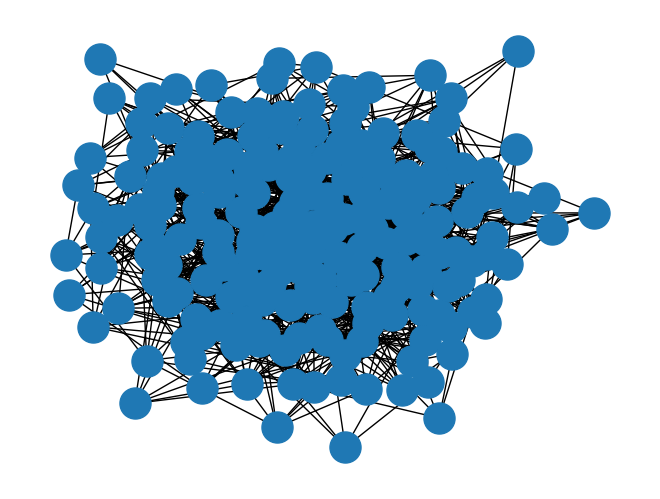

In [4]:
import networkx as nx
import numpy as np
N = 200
p = 0.03
G = nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes():
        r = np.random.poisson(p)
        if r > p:
            G.add_edge(node1,node2)

degrees = [G.degree(node) for node in G.nodes()]
mean_degree = np.mean(degrees)
variance_degree = np.var(degrees)
std_deviation_degree = np.std(degrees)

print(f"Média do grau: {mean_degree:.2f}")
print(f"Variância do grau: {variance_degree:.2f}")
print(f"Desvio padrão do grau: {std_deviation_degree:.2f}")
nx.draw(G, node_size=500, edge_color="black")

Exercício 2.1 - Suponhamos que, em um projeto deseja criar uma rede que segue o modelo normal (o modelo estatístico é modelo contínuo Gaussiano). Considerando o que a média seja 1 e o desvio padrão seja 1. Como será a rede a ser apresentado?

Deve apresentar o grafo, o algoritmo e os valores das estatísticas.

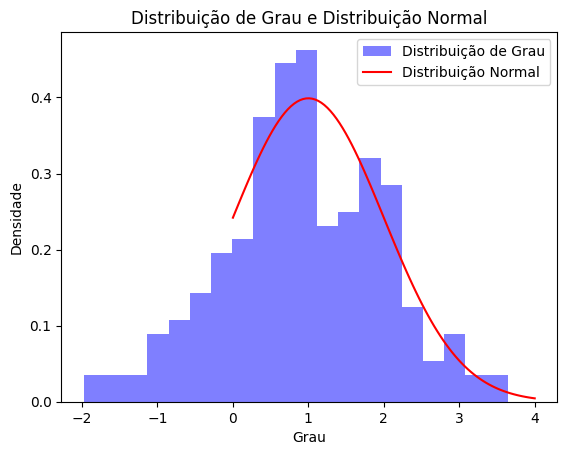

Text(0.5, 1.0, 'Rede Gerada')

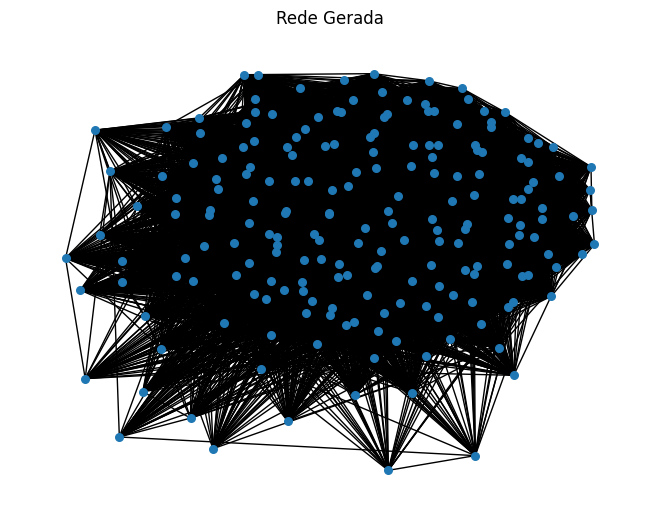

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

media = 1
desvio_padrao = 1
N = 200
graus = np.random.normal(media, desvio_padrao, N)

G = nx.Graph()
G.add_nodes_from(range(N))

for i, grau in enumerate(graus):
    for j in range(i + 1, N):
        p = np.random.rand()
        if p < np.exp(-((grau - media) ** 2) / (2 * desvio_padrao ** 2)):
            G.add_edge(i, j)


plt.hist(graus, bins=20, density=True, alpha=0.5, color='b', label='Distribuição de Grau')
x = np.linspace(0, 4, 100)
y = (1 / (desvio_padrao * np.sqrt(2 * np.pi))) * np.exp(-((x - media) ** 2) / (2 * desvio_padrao ** 2))
plt.plot(x, y, color='r', label='Distribuição Normal')
plt.legend()
plt.xlabel('Grau')
plt.ylabel('Densidade')
plt.title('Distribuição de Grau e Distribuição Normal')
plt.show()

nx.draw(G, with_labels=False, node_size=30)
plt.title('Rede Gerada')


Exercício 3 - Crie o algoritmo de Prim no Python.

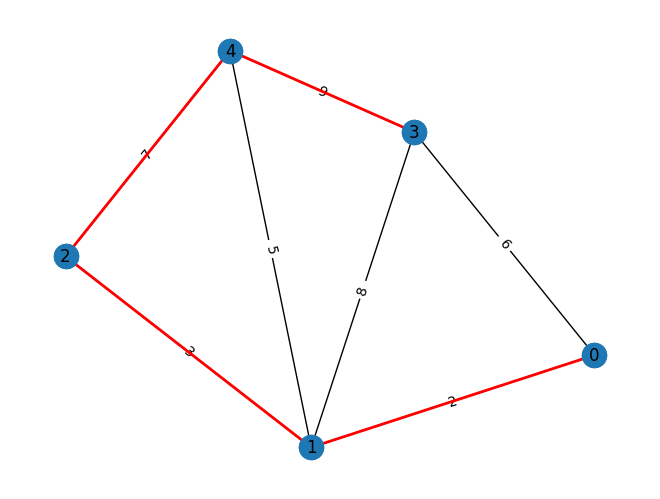

In [35]:
import sys

def prim_mst(graph):
    mst = nx.Graph()
    nodes = list(graph.nodes())
    start_node = nodes[0]

    mst.add_node(start_node)
    while len(mst.nodes()) < len(nodes):
        min_weight = sys.maxsize
        new_node = None
        for node in mst.nodes():
            for neighbor, data in graph[node].items():
                if neighbor not in mst.nodes() and data['weight'] < min_weight:
                    min_weight = data['weight']
                    new_node = neighbor

        if new_node is not None:
            mst.add_node(new_node)
            mst.add_edge(node, new_node, weight=min_weight)

    return mst

G = nx.Graph()

G.add_edge(0, 1, weight=2)
G.add_edge(0, 3, weight=6)
G.add_edge(1, 2, weight=3)
G.add_edge(1, 3, weight=8)
G.add_edge(1, 4, weight=5)
G.add_edge(2, 4, weight=7)
G.add_edge(3, 4, weight=9)

minimum_spanning_tree = prim_mst(G)

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
labels = {e: edge_labels.get(e, '') for e in G.edges}
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(minimum_spanning_tree, pos, edge_color='r', width=2, with_labels=False)
plt.show()

Exercício 4 - Crie o algoritmo de Kruskal no Python.

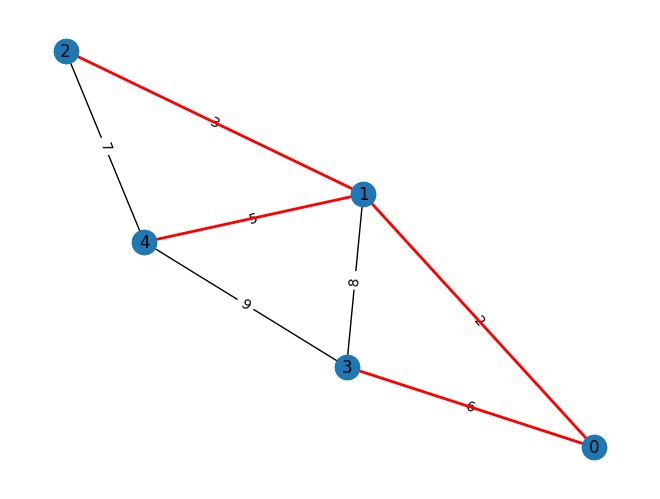

In [36]:
from networkx.utils.union_find import UnionFind

def kruskal_mst(graph):
    mst = nx.Graph()
    edges = list(graph.edges(data=True))
    edges.sort(key=lambda edge: edge[2]['weight'])  # Ordena as arestas por peso

    uf = UnionFind()
    for u, v, data in edges:
        if uf[u] != uf[v]:
            mst.add_edge(u, v, weight=data['weight'])
            uf.union(u, v)

    return mst

G = nx.Graph()

G.add_edge(0, 1, weight=2)
G.add_edge(0, 3, weight=6)
G.add_edge(1, 2, weight=3)
G.add_edge(1, 3, weight=8)
G.add_edge(1, 4, weight=5)
G.add_edge(2, 4, weight=7)
G.add_edge(3, 4, weight=9)

minimum_spanning_tree = kruskal_mst(G)

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
labels = {e: edge_labels.get(e, '') for e in G.edges}
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(minimum_spanning_tree, pos, edge_color='r', width=2, with_labels=False)
plt.show()
